#Hito 1 TF

##Función para graficar el grafo

In [ ]:
import graphviz as gv
import numpy as np
import pandas as pd

def adjlShow(L, lenn, LAmacen, LPuntosEntrega, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  n = len(L)
  for u in range(n):
    colors ="green"
    for almacen in LAmacen:
      if u == almacen[0]+almacen[1]*lenn:
        colors ="red"
    for pEntrega in LPuntosEntrega:
      if u == pEntrega[0]+pEntrega[1]*lenn:
        colors ="blue"
    g.node(str(u), labels[u] if labels else str(u), color = colors)
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

##Función para crear la lista de adyacencia


In [ ]:
def createAdjacencyList(cuadras):
  lenn = cuadras+1
  L = [[] for _ in range(lenn**2)]
  for x in range(0,lenn):
    for y in range(0,lenn):
      if x == 0:
        if y == 0:
          nodo = x + y*lenn
          L[nodo].append(1)
          L[nodo].append(lenn)
        elif y == lenn-1:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo + 1)
        else:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo + 1)
          L[nodo].append(nodo + lenn)
      if y == 0:
        if x == lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - 1)
          L[nodo].append(nodo + lenn)
        elif x!=0 and x < lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - 1)
          L[nodo].append(nodo + 1)
          L[nodo].append(nodo + lenn)
      if y == lenn - 1:
        if x != 0 and x < lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo - 1)
          L[nodo].append(nodo + 1)
        elif x == lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo - 1)
      
      if x == lenn - 1:
        if y != 0 and y < lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo - 1)
          L[nodo].append(nodo + lenn)

      if x > 0 and y > 0 and x < lenn - 1 and y < lenn - 1:
        nodo = x + y*lenn
        L[nodo].append(nodo - lenn)
        L[nodo].append(nodo - 1)
        L[nodo].append(nodo + 1)
        L[nodo].append(nodo + lenn)
  return L

##Función para leer los archivos .csv

In [ ]:
import csv

!wget https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/almacenes.csv -P datasets/
!wget https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/puntos_entrega.csv -P datasets/

!wget https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/ejemplo_almacenes.csv -P datasets/
!wget https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/ejemplo_puntos_entrega.csv -P datasets/

def loadFile(fileName):
  data = []
  with open(fileName, newline='') as File:  
      reader = csv.reader(File)
      for row in reader:
          rowInfo = []
          for num in row:
            rowInfo.append(int(num))
          data.append(rowInfo)
      return data
almacenes = loadFile('datasets/ejemplo_almacenes.csv')
puntosEntrega = loadFile('datasets/ejemplo_puntos_entrega.csv')
print(almacenes)
print(puntosEntrega)

--2021-10-27 10:41:11--  https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/almacenes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512 [text/plain]
Saving to: ‘datasets/almacenes.csv’

almacenes.csv       100%[===================>]     512  --.-KB/s    in 0s      

2021-10-27 10:41:11 (21.8 MB/s) - ‘datasets/almacenes.csv’ saved [512/512]

--2021-10-27 10:41:11--  https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/puntos_entrega.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

##Ejemplo de la lista de adyacencia de una ciudad de 20 x 20 cuadras


In [ ]:
cuadras = 20
L = createAdjacencyList(cuadras)
print(L)

[[1, 21], [0, 2, 22], [1, 3, 23], [2, 4, 24], [3, 5, 25], [4, 6, 26], [5, 7, 27], [6, 8, 28], [7, 9, 29], [8, 10, 30], [9, 11, 31], [10, 12, 32], [11, 13, 33], [12, 14, 34], [13, 15, 35], [14, 16, 36], [15, 17, 37], [16, 18, 38], [17, 19, 39], [18, 20, 40], [19, 41], [0, 22, 42], [1, 21, 23, 43], [2, 22, 24, 44], [3, 23, 25, 45], [4, 24, 26, 46], [5, 25, 27, 47], [6, 26, 28, 48], [7, 27, 29, 49], [8, 28, 30, 50], [9, 29, 31, 51], [10, 30, 32, 52], [11, 31, 33, 53], [12, 32, 34, 54], [13, 33, 35, 55], [14, 34, 36, 56], [15, 35, 37, 57], [16, 36, 38, 58], [17, 37, 39, 59], [18, 38, 40, 60], [19, 39, 41, 61], [20, 40, 62], [21, 43, 63], [22, 42, 44, 64], [23, 43, 45, 65], [24, 44, 46, 66], [25, 45, 47, 67], [26, 46, 48, 68], [27, 47, 49, 69], [28, 48, 50, 70], [29, 49, 51, 71], [30, 50, 52, 72], [31, 51, 53, 73], [32, 52, 54, 74], [33, 53, 55, 75], [34, 54, 56, 76], [35, 55, 57, 77], [36, 56, 58, 78], [37, 57, 59, 79], [38, 58, 60, 80], [39, 59, 61, 81], [40, 60, 62, 82], [41, 61, 83], [4

##Ejemplo del grafo de una ciudad de 20 x 20 cuadras

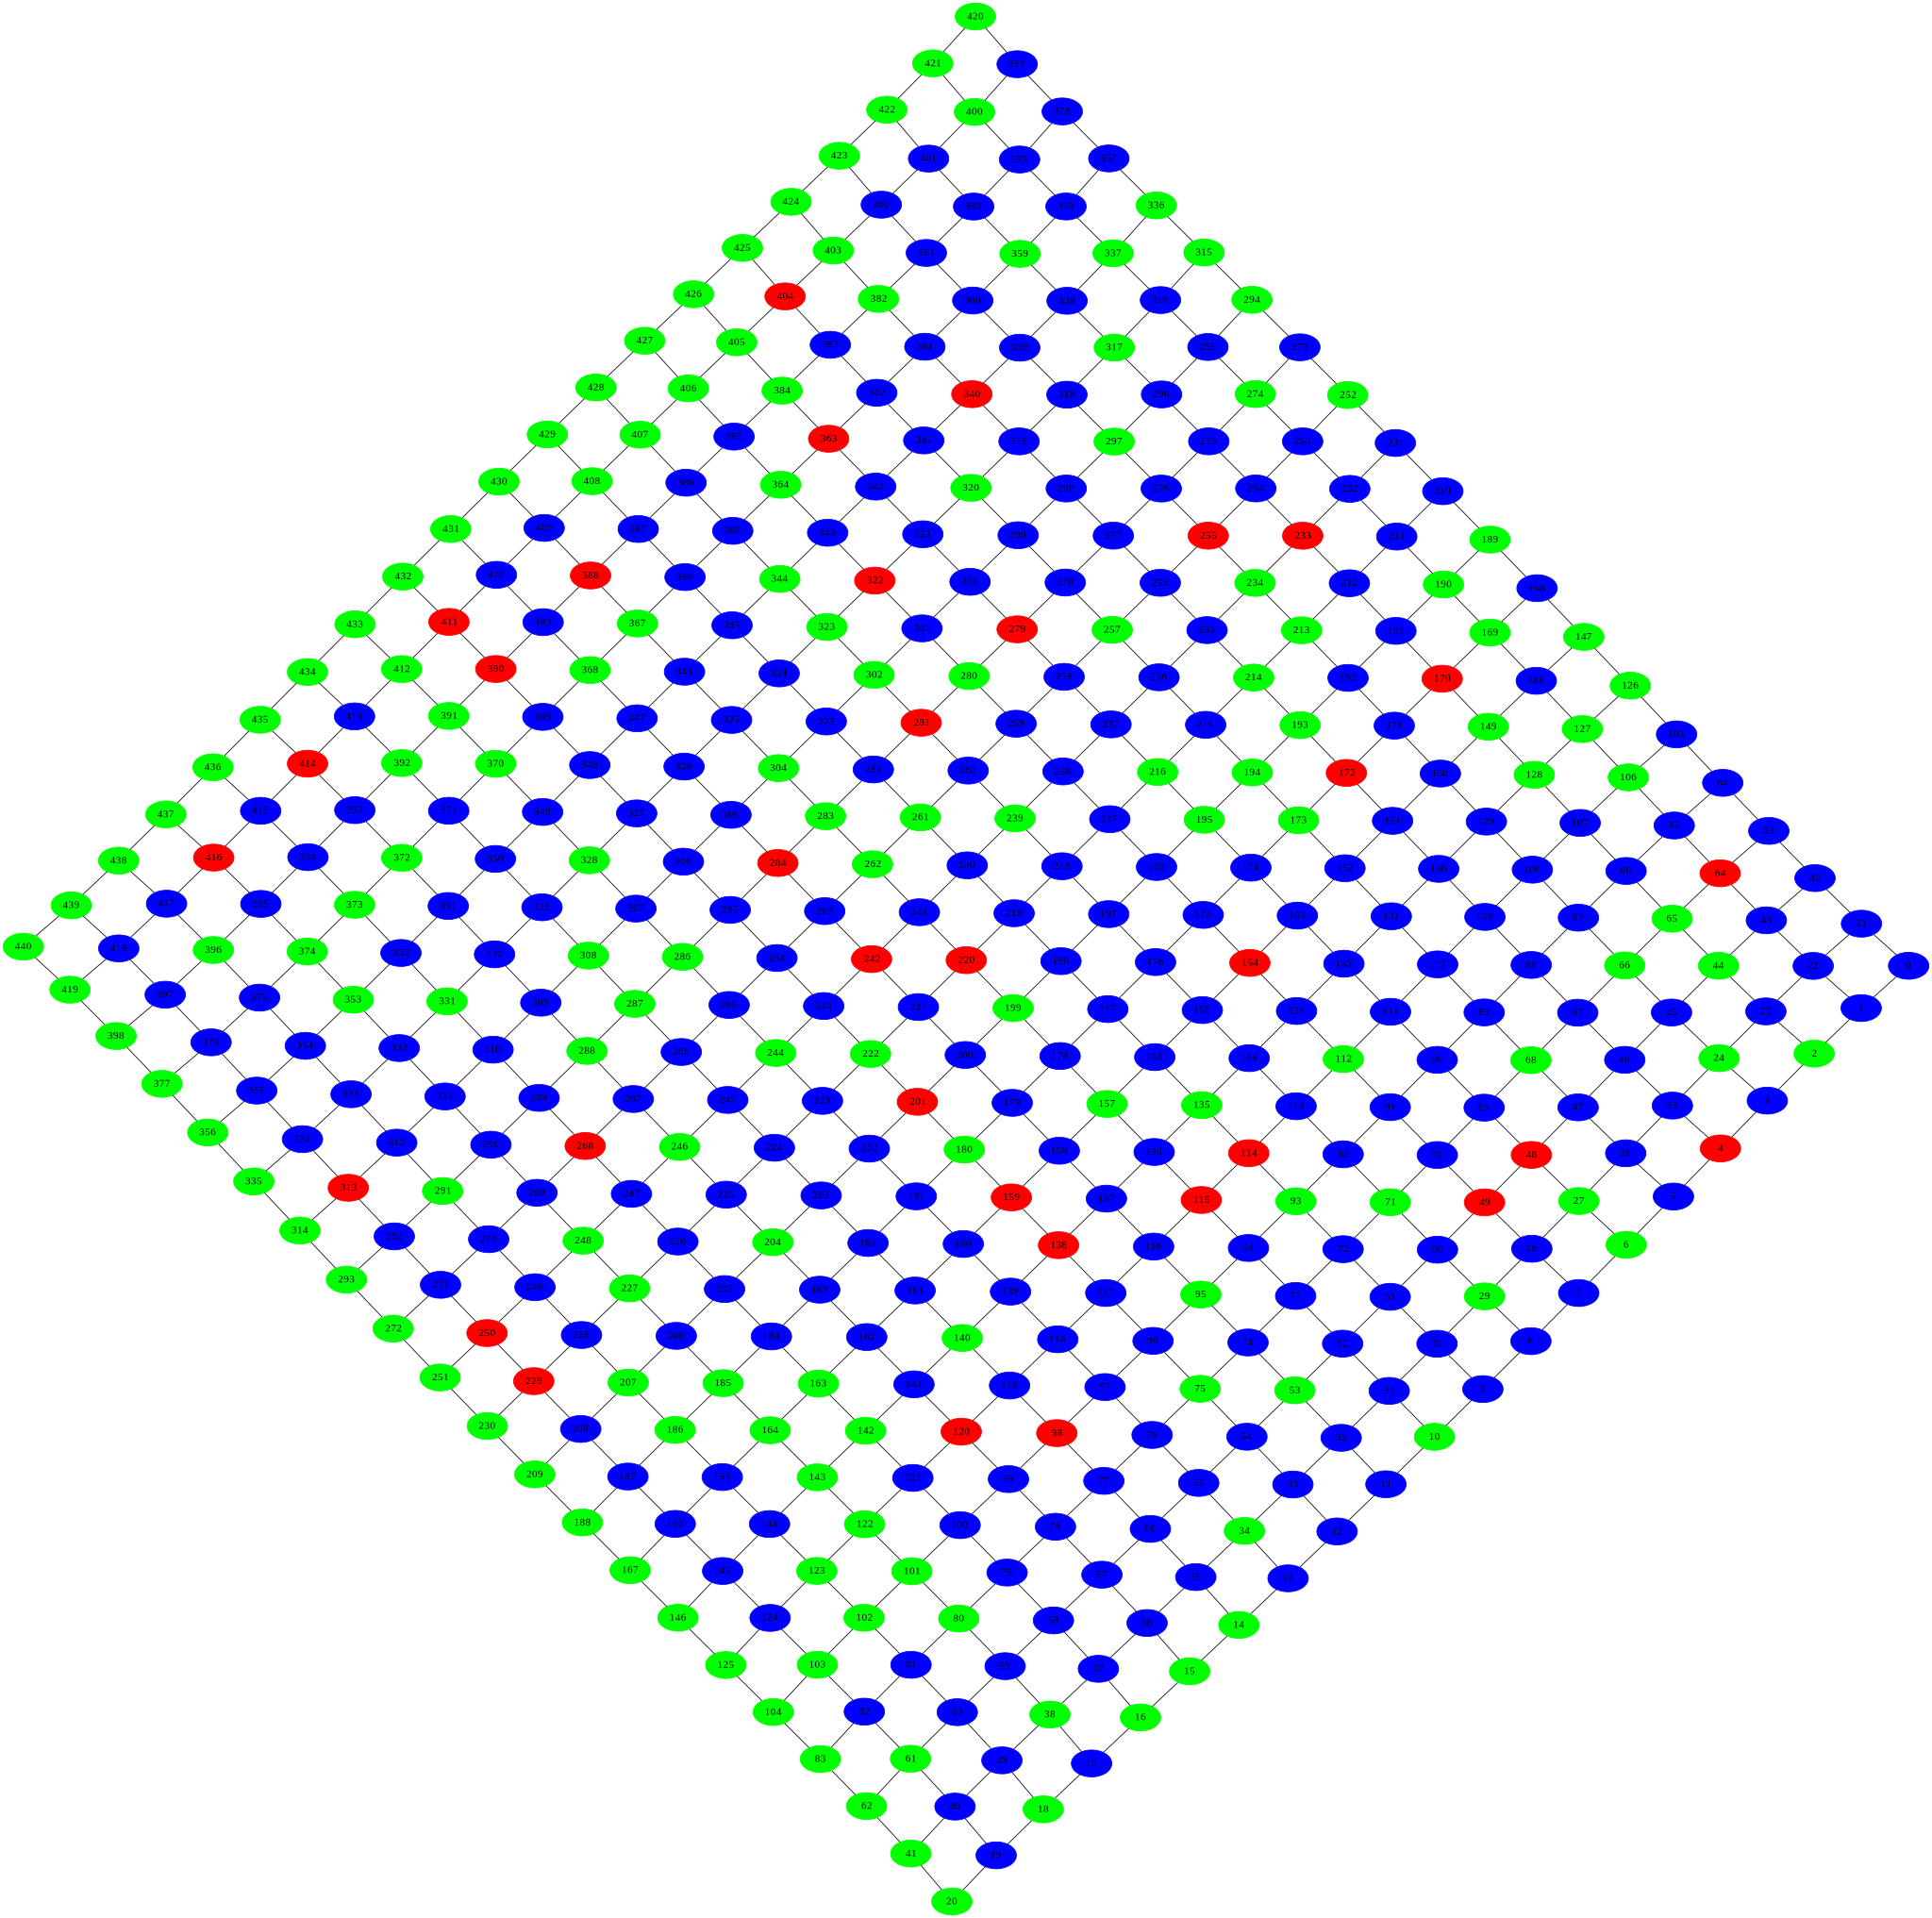

In [ ]:
labs = []
for x in range((cuadras + 1)**2):
  labs.append(str(x))
adjlShow(L, cuadras+1, almacenes, puntosEntrega, labels=labs)

#Ciudad de 50 x 50 cuadras

Puntos de Almacenes:[(0, 2), (0, 6), (0, 18), (0, 32), (0, 44), (1, 20), (1, 26), (2, 4), (2, 9), (2, 37), (2, 43), (2, 45), (3, 8), (3, 29), (3, 30), (3, 41), (3, 48), (4, 2), (4, 22), (4, 23), (4, 28), (4, 32), (4, 34), (4, 44), (5, 13), (5, 27), (5, 28), (5, 31), (5, 45), (5, 46), (6, 24), (6, 38), (7, 1), (7, 2), (7, 19), (7, 26), (7, 27), (7, 33), (7, 36), (7, 38), (7, 43), (8, 5), (8, 23), (8, 31), (8, 49), (9, 7), (9, 10), (9, 13), (9, 19), (9, 23), (9, 27), (9, 41), (9, 44), (10, 2), (10, 4), (10, 7), (10, 13), (10, 33), (10, 43), (11, 0), (11, 3), (11, 4), (11, 6), (11, 23), (11, 25), (11, 28), (11, 29), (11, 33), (12, 11), (12, 16), (12, 22), (12, 33), (13, 7), (13, 15), (14, 7), (14, 9), (14, 15), (14, 36), (14, 42), (14, 46), (15, 1), (15, 12), (15, 25), (15, 27), (15, 39), (16, 25), (16, 32), (16, 33), (16, 35), (16, 47), (17, 2), (17, 35), (17, 48), (18, 3), (18, 6), (18, 11), (18, 20), (18, 22), (18, 26), (18, 34), (18, 44), (19, 3), (19, 18), (19, 23), (19, 30), (19, 35

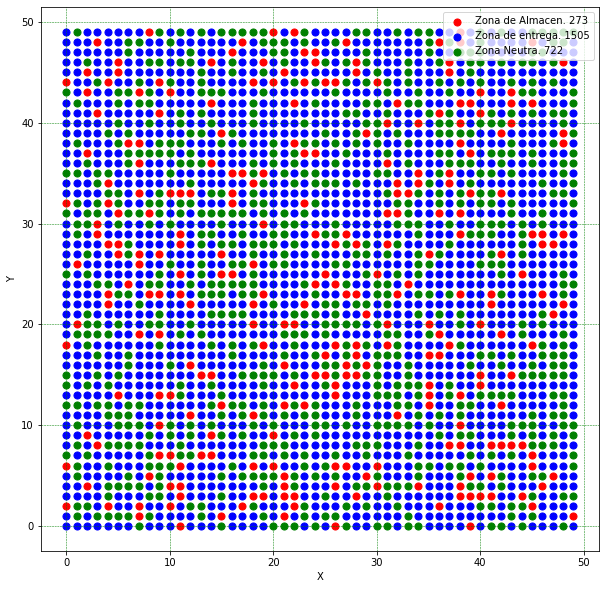

In [ ]:
global str
from random import randint
import matplotlib.pyplot as plt
import numpy as np

# Generate Data
l = 50
maxCantAlmacen = 1500
puntosAlmacen = []
puntosEntrega = []
puntosNeutros = []
for x in range(0, l):
  for y in range(0, l):
    ran = np.random.randint(0,10)
    if ran == 0:
      pointA = (x-1, y)
      pointB = (x, y-1)
      pointC = (x-1, y-1)
      pointD = (x+1, y-1)
      if pointA in puntosAlmacen or pointB in puntosAlmacen or pointC in puntosAlmacen or pointD in puntosAlmacen:
        if len(puntosAlmacen) <= maxCantAlmacen:
          puntosAlmacen.append((x, y))
        else:
          puntosEntrega.append((x, y))
      else:
        if len(puntosAlmacen) <= maxCantAlmacen:
          puntosAlmacen.append((x, y))
        else:
          puntosEntrega.append((x, y))
    elif ran == 1:
      puntosEntrega.append((x, y))
    elif ran == 2:
      puntosEntrega.append((x, y))
    elif ran == 3:
      puntosEntrega.append((x, y))
    elif ran == 4:
      puntosEntrega.append((x, y))
    elif ran == 5:
      puntosEntrega.append((x, y))
    elif ran == 6:
      puntosEntrega.append((x, y))
    elif ran == 7:
      puntosNeutros.append((x, y))
    elif ran == 8:
      puntosNeutros.append((x, y))
    elif ran == 9:
      puntosNeutros.append((x, y))

# Print data in console
print("Puntos de Almacenes:" + str(puntosAlmacen))
print("Puntos de Entrega:" + str(puntosEntrega))

# Export data
np.savetxt("almacenes.csv", puntosAlmacen, fmt='%i', delimiter=",")
np.savetxt("puntos_entrega.csv", puntosEntrega,fmt='%i', delimiter=",")

# Data for plot
plt.figure(figsize=(10,10))
pxDistr = list(map(lambda x: x[0], puntosAlmacen)) 
pyDistr = list(map(lambda x: x[1], puntosAlmacen)) 
pxEntre = list(map(lambda x: x[0], puntosEntrega)) 
pyEntre = list(map(lambda x: x[1], puntosEntrega)) 
pxNeutro = list(map(lambda x: x[0], puntosNeutros)) 
pyNeutro = list(map(lambda x: x[1], puntosNeutros)) 
# Setup UI
plt.scatter(pxDistr,pyDistr,s=50,color="red",label="Zona de Almacen. " + str(len(puntosAlmacen)))
plt.scatter(pxEntre,pyEntre,s=50,color="blue", label="Zona de entrega. " + str(len(puntosEntrega)))
plt.scatter(pxNeutro,pyNeutro,s=50,color="green", label="Zona Neutra. " + str(len(puntosNeutros)))
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()
# Show 
plt.show()